In [2]:
from PIL import Image, ImageDraw
import qrcode
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
url_to_generate = 'https://www.ethermed.ai/'

In [4]:
test_results = []

for version in tqdm(range(1,41)):
    qr = qrcode.QRCode(
            version=version,
            error_correction=qrcode.constants.ERROR_CORRECT_H,
            box_size=1,
            border=0,
        )

    # Add data to the QR code
    qr.add_data(url_to_generate)
    qr.make(fit=True)

    # Create an image from the QR code instance
    img = qr.make_image(fill_color="black", back_color="white")

    img.save('test.png')

    img = Image.open('test.png')

    # Get the pixel data
    pixel_data = list(img.getdata())

    CORRECT_H = pixel_data.count(0)/len(pixel_data)

    qr = qrcode.QRCode(
            version=version,
            error_correction=qrcode.constants.ERROR_CORRECT_Q,
            box_size=1,
            border=0,
        )

    # Add data to the QR code
    qr.add_data(url_to_generate)
    qr.make(fit=True)

    # Create an image from the QR code instance
    img = qr.make_image(fill_color="black", back_color="white")

    img.save('test.png')

    img = Image.open('test.png')

    # Get the pixel data
    pixel_data = list(img.getdata())

    CORRECT_Q = pixel_data.count(0)/len(pixel_data)

    test_results.append((version, CORRECT_H, CORRECT_Q))

100%|██████████| 40/40 [00:05<00:00,  6.80it/s]


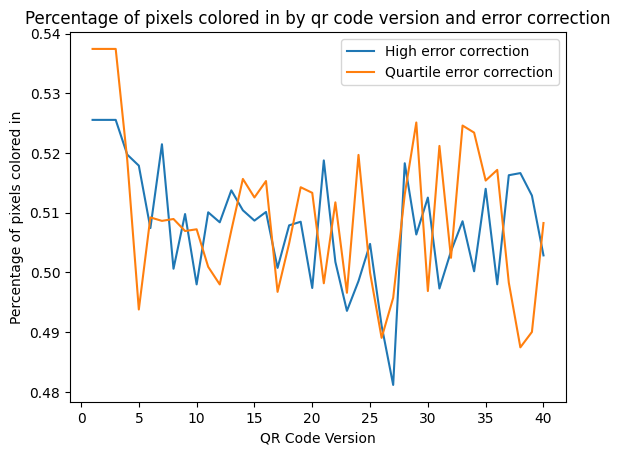

In [7]:
# Extracting columns
x_values = [item[0] for item in test_results]
y1_values = [item[1] for item in test_results]
y2_values = [item[2] for item in test_results]

# Plotting
plt.plot(x_values, y1_values, label='High error correction')
plt.plot(x_values, y2_values, label='Quartile error correction')

# Adding labels and title
plt.xlabel('QR Code Version')
plt.ylabel('Percentage of pixels colored in')
plt.title('Percentage of pixels colored in by qr code version and error correction')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [15]:
test_results